# **ASSIGNMENT 3 - CONVOLUTIONAL NETWORKS**

**DOWNLOADING THE DATA:**

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nithinvarma","key":"30eba1c010d0bc9123cd850a0725520e"}'}

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c dogs-vs-cats

 97% 785M/812M [00:02<00:00, 309MB/s]
100% 812M/812M [00:02<00:00, 308MB/s]


In [4]:
!unzip -qq dogs-vs-cats.zip
!unzip -qq train.zip

**COPYING THE IMAGES TO TRAINING, VALIDATION AND TEST DIRECTORIES**

In [5]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

**TRAINING THE CONVENT NETWORK FROM SCRATCH:**

**MODEL 1: TRAINING SAMPLE OF 1000, VALIDATION SAMPLE OF 500 AND TEST SAMPLE OF 500**

In [6]:
make_subset("test", start_index=0, end_index=500)
make_subset("validation", start_index=500, end_index=1000)
make_subset("train", start_index=1000, end_index=2000)

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

In [8]:
#Instantiating a small convnet for dogs vs. cats classification:

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
Model_1 = keras.Model(inputs=inputs, outputs=outputs)

In [9]:
Model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

In [10]:
#Configuring the model for training:

Model_1.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**DATA PREPROCESSING:**

In [11]:
#Using image_dataset_from_directory to read images

from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)
    

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [12]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [13]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [14]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [15]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


In [16]:
#Displaying the shapes of the data and labels yielded by the Dataset:

for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break
     

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [17]:
#Fitting the model using a Dataset

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = Model_1.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 14s 26ms/step - loss: 0.6948 - accuracy: 0.5255 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 1s 17ms/step - loss: 0.6879 - accuracy: 0.5625 - val_loss: 0.6796 - val_accuracy: 0.5740
Epoch 3/30
63/63 [==============================] - 1s 16ms/step - loss: 0.6705 - accuracy: 0.6030 - val_loss: 0.6437 - val_accuracy: 0.6290
Epoch 4/30
63/63 [==============================] - 1s 16ms/step - loss: 0.6395 - accuracy: 0.6480 - val_loss: 0.6958 - val_accuracy: 0.6120
Epoch 5/30
63/63 [==============================] - 1s 16ms/step - loss: 0.6061 - accuracy: 0.6760 - val_loss: 0.6100 - val_accuracy: 0.6500
Epoch 6/30
63/63 [==============================] - 1s 16ms/step - loss: 0.5813 - accuracy: 0.6955 - val_loss: 0.6526 - val_accuracy: 0.6550
Epoch 7/30
63/63 [==============================] - 1s 16ms/step - loss: 0.5532 - accuracy: 0.7225 - val_loss: 0.6291 - val_accuracy: 0.6580
Epoch 8/30
6

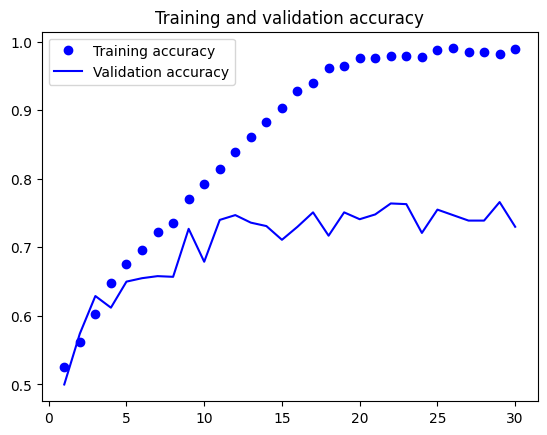

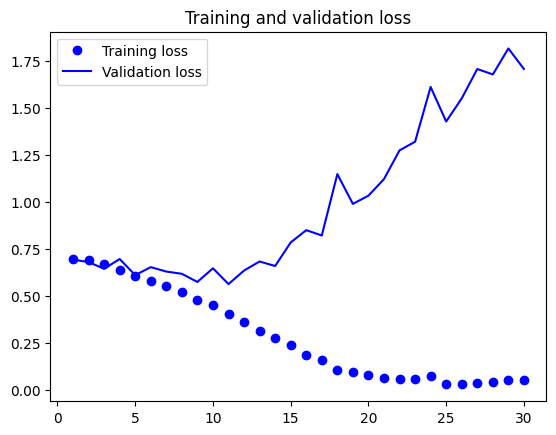

In [18]:
#Displaying curves of loss and accuracy during training:

import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()#

In [19]:
#Evaluating the model on the test set:

test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 0s 8ms/step - loss: 0.5131 - accuracy: 0.7750
Test accuracy: 0.775


**REDUCING THE OVERFITTING MODELS**

**MODEL 2- USING DATA AUGMENTATION:**

In [20]:
from tensorflow import keras
from tensorflow.keras import layers
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [21]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
Model_2 = keras.Model(inputs=inputs, outputs=outputs)

Model_2.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [22]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = Model_2.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
     callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 4s 21ms/step - loss: 0.7054 - accuracy: 0.5040 - val_loss: 0.6928 - val_accuracy: 0.5390
Epoch 2/30
63/63 [==============================] - 1s 18ms/step - loss: 0.6931 - accuracy: 0.5230 - val_loss: 0.6922 - val_accuracy: 0.5070
Epoch 3/30
63/63 [==============================] - 1s 18ms/step - loss: 0.6923 - accuracy: 0.5350 - val_loss: 0.6917 - val_accuracy: 0.5040
Epoch 4/30
63/63 [==============================] - 1s 18ms/step - loss: 0.6933 - accuracy: 0.5655 - val_loss: 0.8097 - val_accuracy: 0.5030
Epoch 5/30
63/63 [==============================] - 1s 18ms/step - loss: 0.6619 - accuracy: 0.6045 - val_loss: 0.6708 - val_accuracy: 0.5700
Epoch 6/30
63/63 [==============================] - 1s 17ms/step - loss: 0.6607 - accuracy: 0.6140 - val_loss: 1.0655 - val_accuracy: 0.5090
Epoch 7/30
63/63 [==============================] - 1s 17ms/step - loss: 0.6452 - accuracy: 0.6420 - val_loss: 0.9006 - val_accuracy: 0.5580
Epoch 8/30
63

In [23]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")


32/32 [==============================] - 0s 8ms/step - loss: 0.4318 - accuracy: 0.8180
Test accuracy: 0.818


In [24]:
#Defining a data augmentation stage to add to an image model:

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

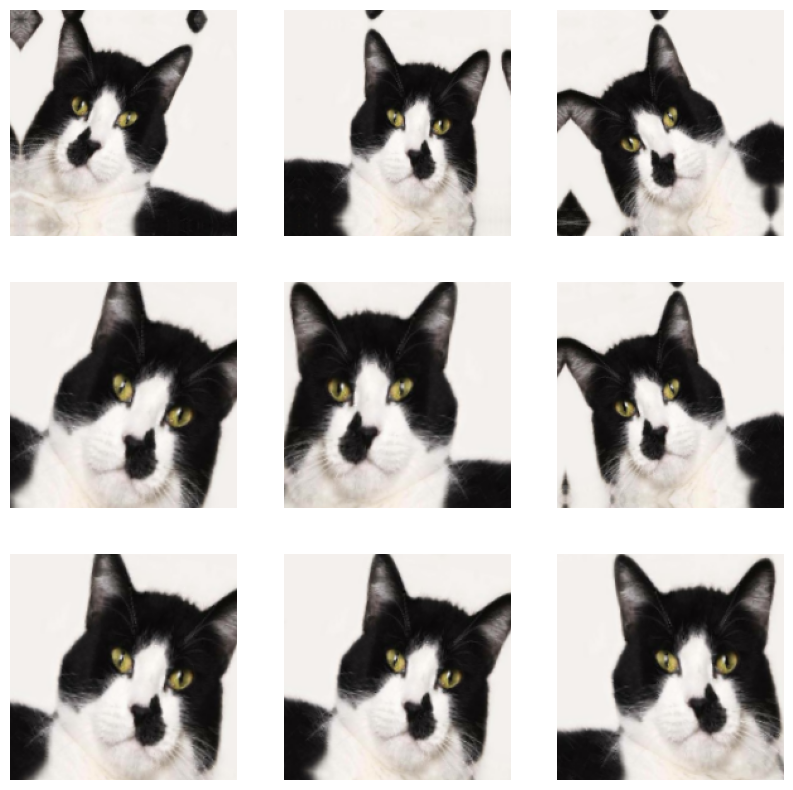

In [25]:
#Displaying some randomly augmented training images

plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**MODEL 3 - DROPOUT METHOD**

In [26]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
Model_3 = keras.Model(inputs=inputs, outputs=outputs)

Model_3.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])


In [27]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_dropout.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = Model_3.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 3s 19ms/step - loss: 0.6992 - accuracy: 0.4935 - val_loss: 0.7026 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 1s 17ms/step - loss: 0.6965 - accuracy: 0.5195 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 3/30
63/63 [==============================] - 1s 16ms/step - loss: 0.6933 - accuracy: 0.5140 - val_loss: 0.6866 - val_accuracy: 0.5970
Epoch 4/30
63/63 [==============================] - 1s 16ms/step - loss: 0.6808 - accuracy: 0.5955 - val_loss: 0.7480 - val_accuracy: 0.5230
Epoch 5/30
63/63 [==============================] - 1s 17ms/step - loss: 0.6582 - accuracy: 0.6085 - val_loss: 0.6397 - val_accuracy: 0.6350
Epoch 6/30
63/63 [==============================] - 1s 16ms/step - loss: 0.6302 - accuracy: 0.6485 - val_loss: 0.6466 - val_accuracy: 0.6310
Epoch 7/30
63/63 [==============================] - 1s 17ms/step - loss: 0.6087 - accuracy: 0.6770 - val_loss: 0.6090 - val_accuracy: 0.6500
Epoch 8/30
63

In [28]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_dropout.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 0s 8ms/step - loss: 0.5300 - accuracy: 0.7470
Test accuracy: 0.747


**MODEL 4 - DATA AUGMENTATION AND DROPOUT METHOD:**

In [29]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [30]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
Model_4 = keras.Model(inputs=inputs, outputs=outputs)

Model_4.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [31]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation_dropout.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = Model_4.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 4s 21ms/step - loss: 0.7017 - accuracy: 0.5015 - val_loss: 0.6926 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 1s 18ms/step - loss: 0.7121 - accuracy: 0.5210 - val_loss: 0.6904 - val_accuracy: 0.5600
Epoch 3/30
63/63 [==============================] - 1s 18ms/step - loss: 0.6888 - accuracy: 0.5430 - val_loss: 0.6882 - val_accuracy: 0.5430
Epoch 4/30
63/63 [==============================] - 1s 17ms/step - loss: 0.6744 - accuracy: 0.5985 - val_loss: 1.4022 - val_accuracy: 0.5050
Epoch 5/30
63/63 [==============================] - 1s 18ms/step - loss: 0.6794 - accuracy: 0.6070 - val_loss: 0.6681 - val_accuracy: 0.6060
Epoch 6/30
63/63 [==============================] - 1s 17ms/step - loss: 0.6578 - accuracy: 0.6075 - val_loss: 0.6939 - val_accuracy: 0.5880
Epoch 7/30
63/63 [==============================] - 1s 18ms/step - loss: 0.6497 - accuracy: 0.6245 - val_loss: 0.6488 - val_accuracy: 0.6350
Epoch 8/30
63

In [32]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation_dropout.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 0s 8ms/step - loss: 0.4300 - accuracy: 0.8010
Test accuracy: 0.801


**MODEL 5 - INCREASING THE TRAINING SAMPLE SIZE TO 5000, INCLUDING MAXPOOLING, DATA AUGMENTATION AND DROPOUT TECHNIQUE (DROPOUT RATE = 0.05)**

In [33]:
from tensorflow.keras.utils import image_dataset_from_directory

make_subset("train_1", start_index=0, end_index=5000)
make_subset("validation_1", start_index=5000, end_index=5500)
make_subset("test_1", start_index=5500, end_index=6000)

train_dataset_1 = image_dataset_from_directory(
    new_base_dir / "train_1",
    image_size=(180, 180),
    batch_size=32)
validation_dataset_1 = image_dataset_from_directory(
    new_base_dir / "validation_1",
    image_size=(180, 180),
    batch_size=32)
test_dataset_1 = image_dataset_from_directory(
    new_base_dir / "test_1",
    image_size=(180, 180),
    batch_size=32)

Found 10000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [34]:
#Defining a new convnet that includes image augmentation and dropout

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
Model_5 = keras.Model(inputs=inputs, outputs=outputs)

Model_5.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [35]:
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from keras import regularizers

early_stopping_monitor = EarlyStopping(patience=10)

In [36]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

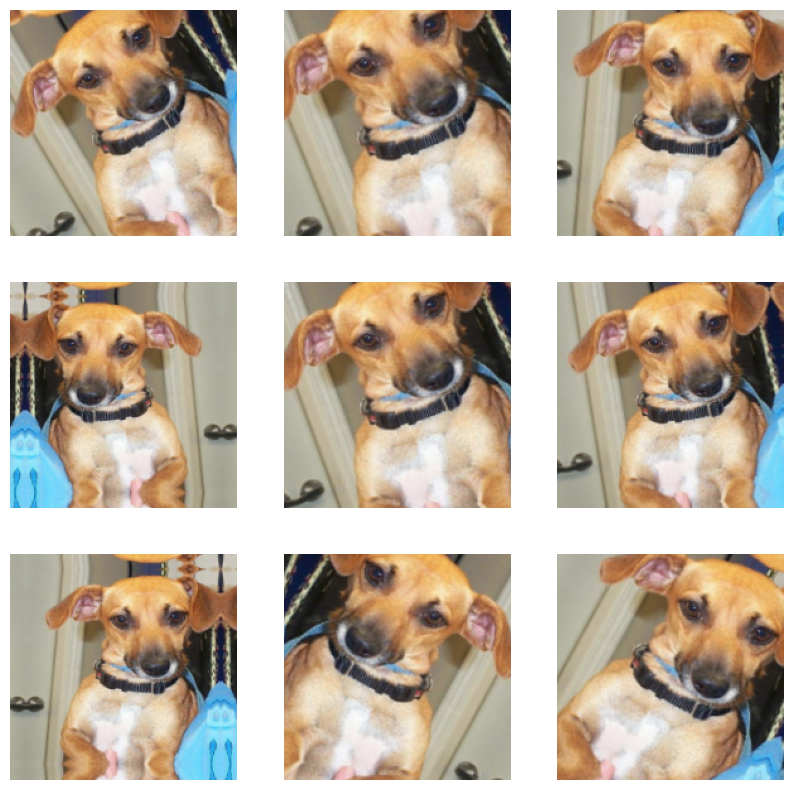

In [37]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [38]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss"), early_stopping_monitor
]
history = Model_5.fit(
    train_dataset_1,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
313/313 [==============================] - 6s 13ms/step - loss: 0.6802 - accuracy: 0.5642 - val_loss: 0.7690 - val_accuracy: 0.5370
Epoch 2/30
313/313 [==============================] - 4s 12ms/step - loss: 0.5946 - accuracy: 0.6835 - val_loss: 0.5345 - val_accuracy: 0.7440
Epoch 3/30
313/313 [==============================] - 4s 12ms/step - loss: 0.5292 - accuracy: 0.7407 - val_loss: 0.5324 - val_accuracy: 0.7310
Epoch 4/30
313/313 [==============================] - 4s 12ms/step - loss: 0.4648 - accuracy: 0.7838 - val_loss: 0.4498 - val_accuracy: 0.8120
Epoch 5/30
313/313 [==============================] - 4s 12ms/step - loss: 0.4055 - accuracy: 0.8210 - val_loss: 0.3466 - val_accuracy: 0.8600
Epoch 6/30
313/313 [==============================] - 4s 12ms/step - loss: 0.3592 - accuracy: 0.8432 - val_loss: 0.3475 - val_accuracy: 0.8500
Epoch 7/30
313/313 [==============================] - 4s 12ms/step - loss: 0.3092 - accuracy: 0.8685 - val_loss: 0.2457 - val_accuracy: 0.9090

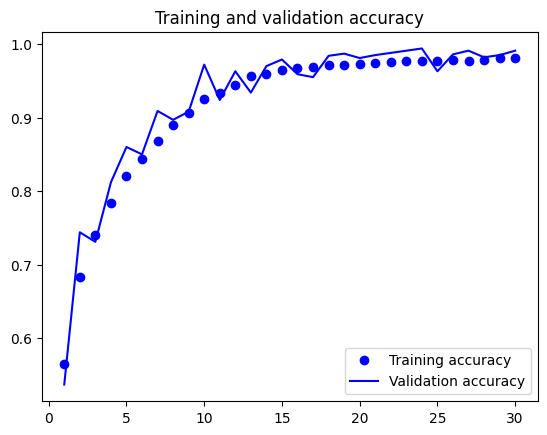

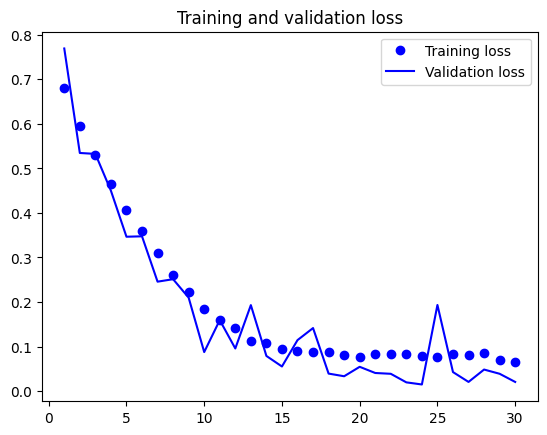

In [39]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [40]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset_1)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 0s 8ms/step - loss: 0.6273 - accuracy: 0.8810
Test accuracy: 0.881


**MODEL 6 - INCREASING THE TRAINING SAMPLE TO 10000**

In [41]:
from tensorflow.keras.utils import image_dataset_from_directory


make_subset("train_4", start_index=0, end_index=10000)
make_subset("validation_4", start_index=10000, end_index=10500)
make_subset("test_4", start_index=10500, end_index=11000)

train_dataset_4 = image_dataset_from_directory(
    new_base_dir / "train_4",
    image_size=(180, 180),
    batch_size=32)
validation_dataset_4 = image_dataset_from_directory(
    new_base_dir / "validation_4",
    image_size=(180, 180),
    batch_size=32)
test_dataset_4 = image_dataset_from_directory(
    new_base_dir / "test_4",
    image_size=(180, 180),
    batch_size=32)

Found 20000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [42]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
Model_6 = keras.Model(inputs=inputs, outputs=outputs)

Model_6.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [43]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

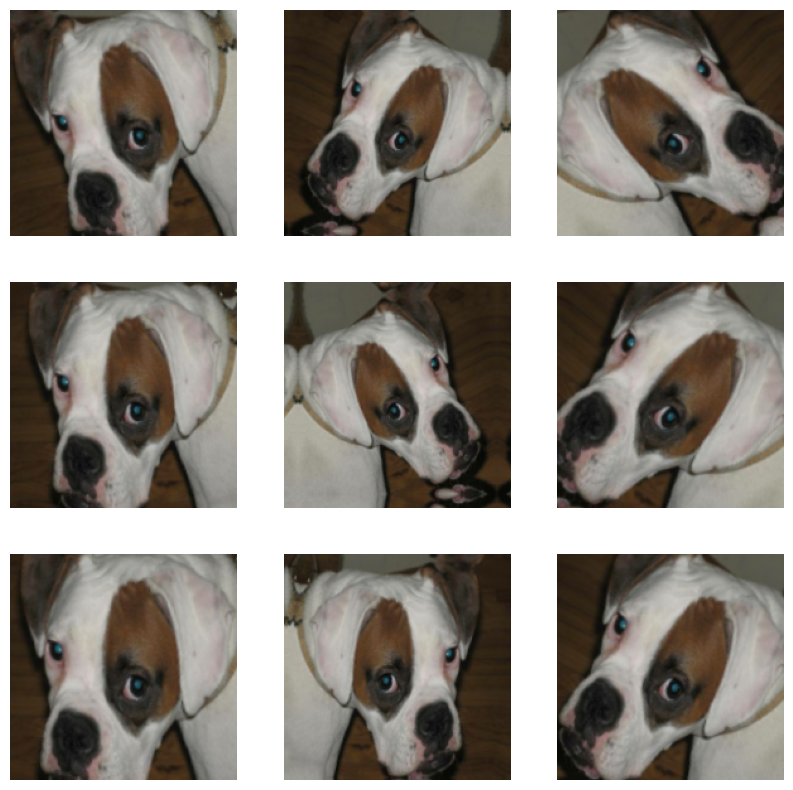

In [44]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [46]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss"), early_stopping_monitor
]
history = Model_6.fit(
    train_dataset_4,
    epochs=30,
    validation_data=validation_dataset_4,
    callbacks=callbacks)

Epoch 1/30
625/625 [==============================] - 8s 12ms/step - loss: 0.3643 - accuracy: 0.8371 - val_loss: 0.3227 - val_accuracy: 0.8560
Epoch 2/30
625/625 [==============================] - 7s 12ms/step - loss: 0.2954 - accuracy: 0.8752 - val_loss: 0.2521 - val_accuracy: 0.8890
Epoch 3/30
625/625 [==============================] - 8s 12ms/step - loss: 0.2464 - accuracy: 0.8967 - val_loss: 0.2473 - val_accuracy: 0.8960
Epoch 4/30
625/625 [==============================] - 7s 12ms/step - loss: 0.2111 - accuracy: 0.9122 - val_loss: 0.4073 - val_accuracy: 0.8780
Epoch 5/30
625/625 [==============================] - 7s 12ms/step - loss: 0.1758 - accuracy: 0.9312 - val_loss: 0.2734 - val_accuracy: 0.8990
Epoch 6/30
625/625 [==============================] - 7s 12ms/step - loss: 0.1546 - accuracy: 0.9385 - val_loss: 0.3572 - val_accuracy: 0.8960
Epoch 7/30
625/625 [==============================] - 8s 12ms/step - loss: 0.1365 - accuracy: 0.9466 - val_loss: 0.2217 - val_accuracy: 0.9300

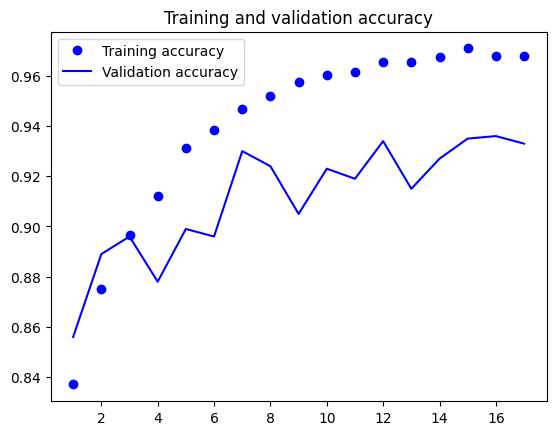

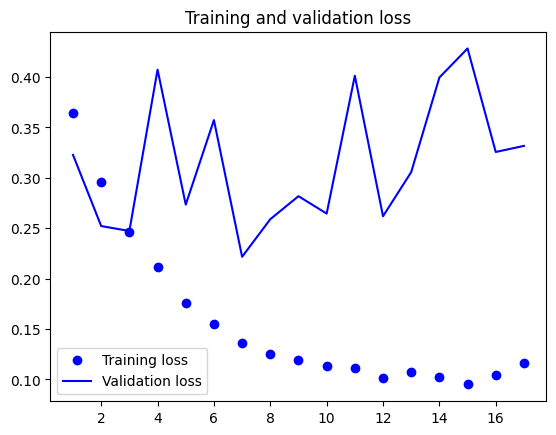

In [47]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [48]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset_4)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 0s 8ms/step - loss: 0.3276 - accuracy: 0.8960
Test accuracy: 0.896


**INSTANTIATING AND FREEZING THE VGG16 CONVOLUTIONAL BASE**

**PRE-TRAINED MODEL**


**MODEL 7 - SAMPLE SIZE OF 1000**

In [49]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [50]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [51]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)

In [52]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [53]:
#Adding a data augmentation stage and a classifier to the convolutional base:

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [54]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
Model_7 = keras.Model(inputs, outputs)
Model_7.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

In [55]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = Model_7.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 6s 46ms/step - loss: 3.2497 - accuracy: 0.7720 - val_loss: 0.6321 - val_accuracy: 0.9280
Epoch 2/30
63/63 [==============================] - 2s 32ms/step - loss: 1.0347 - accuracy: 0.8850 - val_loss: 0.3817 - val_accuracy: 0.9420
Epoch 3/30
63/63 [==============================] - 2s 32ms/step - loss: 0.5687 - accuracy: 0.9255 - val_loss: 0.2525 - val_accuracy: 0.9600
Epoch 4/30
63/63 [==============================] - 2s 32ms/step - loss: 0.3775 - accuracy: 0.9255 - val_loss: 0.2174 - val_accuracy: 0.9650
Epoch 5/30
63/63 [==============================] - 2s 32ms/step - loss: 0.2632 - accuracy: 0.9385 - val_loss: 0.1806 - val_accuracy: 0.9710
Epoch 6/30
63/63 [==============================] - 2s 32ms/step - loss: 0.1979 - accuracy: 0.9505 - val_loss: 0.1758 - val_accuracy: 0.9720
Epoch 7/30
63/63 [==============================] - 2s 28ms/step - loss: 0.1736 - accuracy: 0.9570 - val_loss: 0.1876 - val_accuracy: 0.9690
Epoch 8/30
63

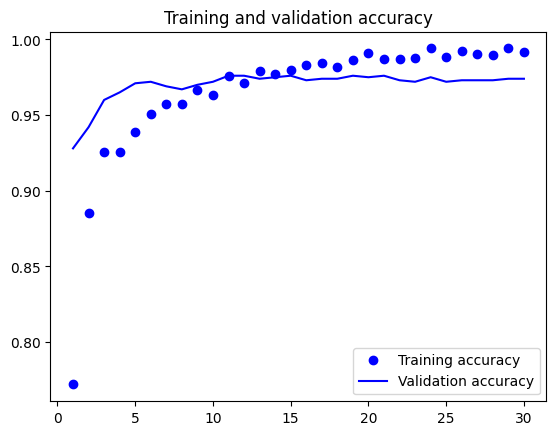

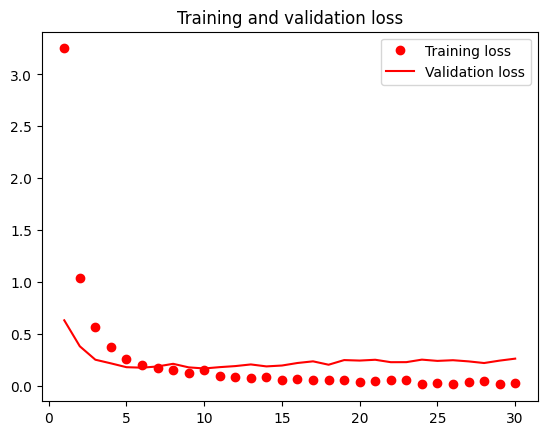

In [56]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "ro", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [57]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 17ms/step - loss: 0.1741 - accuracy: 0.9750
Test accuracy: 0.975


**MODEL 8 - SAMPLE SIZE OF 5000**

In [58]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [59]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)

conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [60]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [61]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
Model_8 = keras.Model(inputs, outputs)
Model_8.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

In [62]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning2.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = Model_8.fit(
    train_dataset_1,
    epochs=10,
    validation_data=validation_dataset_1,
    callbacks=callbacks)

Epoch 1/10
313/313 [==============================] - 9s 22ms/step - loss: 1.2848 - accuracy: 0.8722 - val_loss: 0.1851 - val_accuracy: 0.9700
Epoch 2/10
313/313 [==============================] - 7s 21ms/step - loss: 0.2351 - accuracy: 0.9374 - val_loss: 0.1229 - val_accuracy: 0.9710
Epoch 3/10
313/313 [==============================] - 7s 21ms/step - loss: 0.1626 - accuracy: 0.9495 - val_loss: 0.0972 - val_accuracy: 0.9720
Epoch 4/10
313/313 [==============================] - 6s 20ms/step - loss: 0.1371 - accuracy: 0.9562 - val_loss: 0.1211 - val_accuracy: 0.9770
Epoch 5/10
313/313 [==============================] - 7s 21ms/step - loss: 0.1175 - accuracy: 0.9629 - val_loss: 0.0948 - val_accuracy: 0.9750
Epoch 6/10
313/313 [==============================] - 6s 20ms/step - loss: 0.0960 - accuracy: 0.9700 - val_loss: 0.1081 - val_accuracy: 0.9800
Epoch 7/10
313/313 [==============================] - 6s 20ms/step - loss: 0.0896 - accuracy: 0.9724 - val_loss: 0.1003 - val_accuracy: 0.9780

In [63]:
model = keras.models.load_model("fine_tuning2.keras")
test_loss, test_acc = model.evaluate(test_dataset_1)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 18ms/step - loss: 0.1046 - accuracy: 0.9780
Test accuracy: 0.978


**MODEL 9 - SAMPLE SIZE OF 10000**

In [64]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [65]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)

conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [66]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [67]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
Model_9 = keras.Model(inputs, outputs)
Model_9.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

In [68]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning3.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = Model_9.fit(
    train_dataset_4,
    epochs=10,
    validation_data=validation_dataset_4,
    callbacks=callbacks)

Epoch 1/10
625/625 [==============================] - 15s 20ms/step - loss: 0.7017 - accuracy: 0.9071 - val_loss: 0.2010 - val_accuracy: 0.9730
Epoch 2/10
625/625 [==============================] - 13s 20ms/step - loss: 0.1466 - accuracy: 0.9510 - val_loss: 0.1692 - val_accuracy: 0.9770
Epoch 3/10
625/625 [==============================] - 13s 20ms/step - loss: 0.1150 - accuracy: 0.9606 - val_loss: 0.1246 - val_accuracy: 0.9800
Epoch 4/10
625/625 [==============================] - 12s 19ms/step - loss: 0.1077 - accuracy: 0.9657 - val_loss: 0.1270 - val_accuracy: 0.9760
Epoch 5/10
625/625 [==============================] - 12s 20ms/step - loss: 0.0864 - accuracy: 0.9715 - val_loss: 0.1714 - val_accuracy: 0.9770
Epoch 6/10
625/625 [==============================] - 12s 20ms/step - loss: 0.0811 - accuracy: 0.9725 - val_loss: 0.2315 - val_accuracy: 0.9810
Epoch 7/10
625/625 [==============================] - 12s 20ms/step - loss: 0.0822 - accuracy: 0.9733 - val_loss: 0.1656 - val_accuracy:

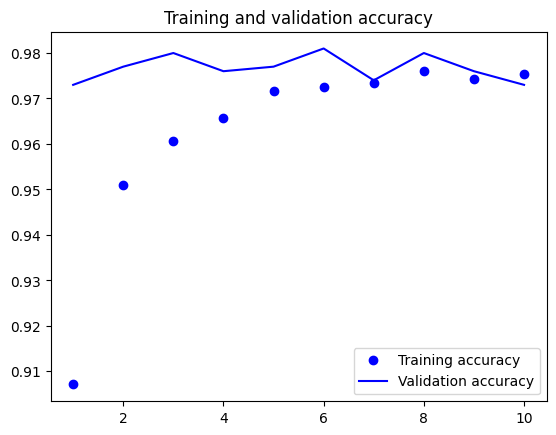

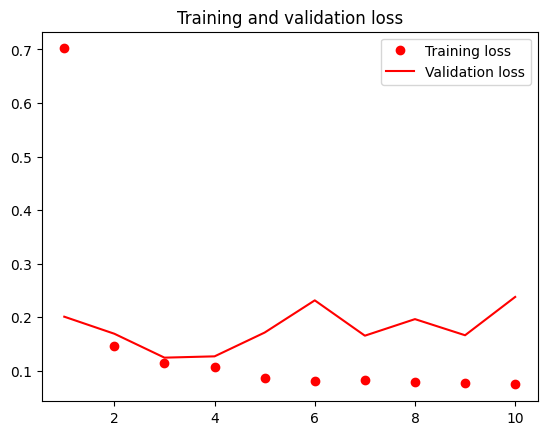

In [69]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "ro", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [70]:
model = keras.models.load_model("fine_tuning3.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 17ms/step - loss: 0.0595 - accuracy: 0.9800
Test accuracy: 0.980


**SCRATCH MODELS:**

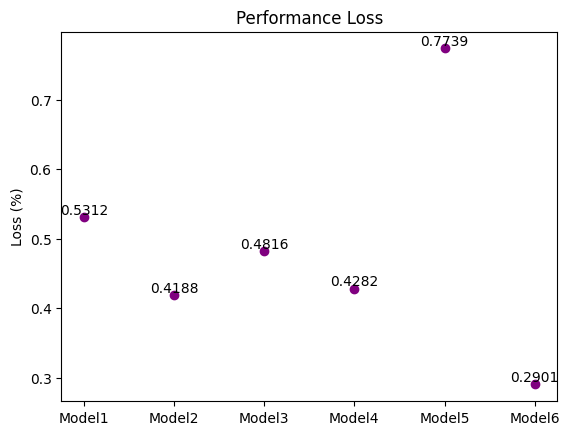

In [71]:
loss_dict = {'Model1': 0.5312, 'Model2': 0.4188, 'Model3': 0.4816, 'Model4': 0.4282,
             'Model5': 0.7739, 'Model6': 0.2901}

# Get model names and loss values as separate lists
models = list(loss_dict.keys())
losses = list(loss_dict.values())

# Plot the scatter plot with labels
plt.scatter(models, losses, color='purple')
plt.title('Performance Loss')
plt.ylabel('Loss (%)')

for (xi, yi) in zip(models, losses):
    plt.text(xi, yi, str(yi), va='bottom', ha='center')


In [ ]:
import matplotlib.pyplot as plt

# Create a dictionary with model names as keys and accuracy values as values
acc_dict = {'Model1': 0.729, 'Model2': 0.801, 'Model3': 0.772, 'Model4': 0.801,
            'Model5': 0.871, 'Model6': 0.897}

# Get model names and accuracy values as separate lists
models = list(acc_dict.keys())
accuracy = list(acc_dict.values())

# Plot the scatter plot with labels
plt.scatter(models, accuracy, color='red')
plt.title('Performance Accuracy')
plt.ylabel('Accuracy (%)')

for (xi, yi) in zip(models, accuracy):
  plt.text(xi, yi, str(yi), va='bottom', ha='center')

plt.show()

**PRE-TRAINED MODELS:**

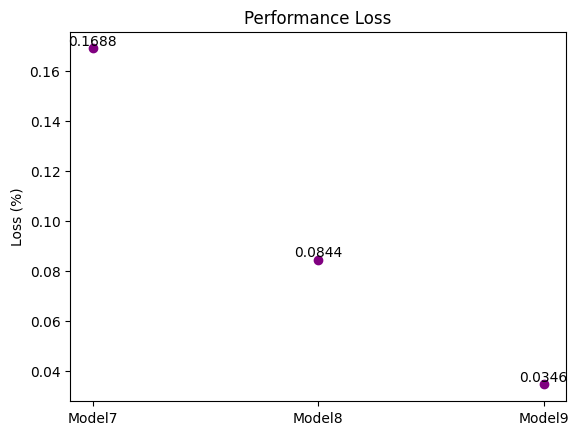

In [73]:
loss_dict = {'Model7': 0.1688, 'Model8': 0.0844, 'Model9': 0.0346}

# Get model names and loss values as separate lists
models = list(loss_dict.keys())
losses = list(loss_dict.values())

# Plot the scatter plot with labels
plt.scatter(models, losses, color='purple')
plt.title('Performance Loss')
plt.ylabel('Loss (%)')

for (xi, yi) in zip(models, losses):
    plt.text(xi, yi, str(yi), va='bottom', ha='center')

plt.show()


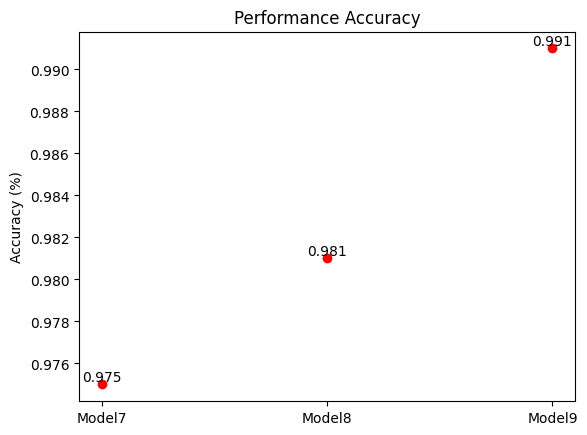

In [74]:
# Create a dictionary with model names as keys and accuracy values as values
acc_dict = {'Model7': 0.975, 'Model8': 0.981, 'Model9': 0.991}

# Get model names and accuracy values as separate lists
models = list(acc_dict.keys())
accuracy = list(acc_dict.values())

# Plot the scatter plot with labels
plt.scatter(models, accuracy, color='red')
plt.title('Performance Accuracy')
plt.ylabel('Accuracy (%)')

for (xi, yi) in zip(models, accuracy):
  plt.text(xi, yi, str(yi), va='bottom', ha='center')
